In [1]:
import xarray as xr
import rioxarray as rio
# import dask
# import datacube

import matplotlib.pyplot as plt
# from dask.distributed import Client

%matplotlib inline

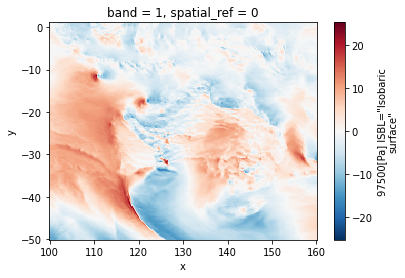

In [2]:
rr = rio.open_rasterio("/home/rvalavi/Downloads/gfs_vgrd_20220301_t00z_f010")
rr.plot()

In [3]:
rr

<xarray.DataArray (band: 1, y: 205, x: 241)>
array([[[ -0.123945,  -1.033945, ...,  -1.103945,  -0.693945],
        [  0.316055,   0.206055, ...,  -0.833945,  -0.413945],
        ...,
        [-12.993945, -12.783945, ...,   3.166055,   3.356055],
        [-13.023945, -12.773945, ...,   3.266055,   3.466055]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 100.0 100.2 100.5 100.8 ... 159.2 159.5 159.8 160.0
  * y            (y) float64 1.0 0.75 0.5 0.25 0.0 ... -49.25 -49.5 -49.75 -50.0
    spatial_ref  int64 0
Attributes:
    GRIB_COMMENT:                        v-component of wind [m/s]
    GRIB_DISCIPLINE:                     0(Meteorological)
    GRIB_ELEMENT:                        VGRD
    GRIB_FORECAST_SECONDS:               36000 sec
    GRIB_IDS:                            CENTER=7(US-NCEP) SUBCENTER=0 MASTER...
    GRIB_PDS_PDTN:                       0
    GRIB_PDS_TEMPLATE_ASSEMBLED_VALUES:  2 3 2 0 96 0 0 1 10 100 0 97500 255 0 0
    GRIB_PDS_TEMPLATE_NUMBERS:           2 3 2 0 96 0 0 0 1 0 0 0 10 100 0 0 ...
    GRIB_REF_TIME:                       1646092800 sec UTC
    GRIB_SHORT_NAME:                     97500-ISBL
    GRIB_UNIT:                           [m/s]
    GRIB_VALID_TIME:                     1646128800 sec UTC
    scale_factor:                        1.0
    add_offset:                          0.0
    long_name:                           97500[Pa] ISBL="Isobaric surface"

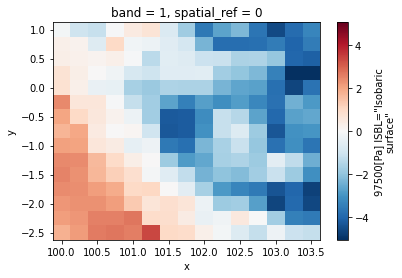

In [4]:
# cells = [i + 1 for i in range(15)]
r = rr.isel(x = range(15), y = range(15))
r.plot()

In [5]:
r

<xarray.DataArray (band: 1, y: 15, x: 15)>
array([[[-0.123945, -1.033945, ..., -3.883945, -3.353945],
        [ 0.316055,  0.206055, ..., -4.063945, -3.523945],
        ...,
        [ 2.126055,  2.246055, ..., -3.453945, -3.593945],
        [ 1.786055,  2.156055, ..., -1.103945, -1.193945]]])
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 100.0 100.2 100.5 100.8 ... 102.8 103.0 103.2 103.5
  * y            (y) float64 1.0 0.75 0.5 0.25 0.0 ... -1.75 -2.0 -2.25 -2.5
    spatial_ref  int64 0
Attributes:
    GRIB_COMMENT:                        v-component of wind [m/s]
    GRIB_DISCIPLINE:                     0(Meteorological)
    GRIB_ELEMENT:                        VGRD
    GRIB_FORECAST_SECONDS:               36000 sec
    GRIB_IDS:                            CENTER=7(US-NCEP) SUBCENTER=0 MASTER...
    GRIB_PDS_PDTN:                       0
    GRIB_PDS_TEMPLATE_ASSEMBLED_VALUES:  2 3 2 0 96 0 0 1 10 100 0 97500 255 0 0
    GRIB_PDS_TEMPLATE_NUMBERS:           2 3 2 0 96 0 0 0 1 0 0 0 10 100 0 0 ...
    GRIB_REF_TIME:                       1646092800 sec UTC
    GRIB_SHORT_NAME:                     97500-ISBL
    GRIB_UNIT:                           [m/s]
    GRIB_VALID_TIME:                     1646128800 sec UTC
    scale_factor:                        1.0
    add_offset:                          0.0
    long_name:                           97500[Pa] ISBL="Isobaric surface"

In [6]:
r.values.shape

(1, 15, 15)

In [7]:
r[0][10, 1] = 5
r[0].values[10, 1]

5.0

In [9]:
r.values[0, 2, [2, 3, 4]]

array([ 0.18605468,  0.30605468, -0.07394531])

In [14]:
import rioxarray as rio
from datetime import datetime
import os

# read wind data and keep their information
def read_wind(path):
    files = os.listdir(path)
    rlist = []
    for i in files:
        if i.startswith("gfs_"):
            name = os.path.join(path, i)
            _, comp, date, time, fcst = i.split("_")
            r = rio.open_rasterio(name, chunks=[1024,1024]).assign_coords(
                {'date': datetime(int(date[0:4]), int(date[4:6]), int(date[6:8])),
                'time':  str(time),
                'Component': str(comp),
                'Forecast': str(fcst)}
            )
            rlist.append(r)
    stack = xr.concat(rlist, dim = "band")
    return stack


In [13]:
rr = read_wind(path = "/home/rvalavi/Downloads/GFSdata/")
rr

<xarray.DataArray (band: 20, y: 205, x: 241)>
dask.array<concatenate, shape=(20, 205, 241), dtype=float64, chunksize=(1, 205, 241), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  * x            (x) float64 100.0 100.2 100.5 100.8 ... 159.2 159.5 159.8 160.0
  * y            (y) float64 1.0 0.75 0.5 0.25 0.0 ... -49.25 -49.5 -49.75 -50.0
    spatial_ref  int64 0
    date         datetime64[ns] 2022-05-05
    time         <U4 't00z'
    Component    (band) <U4 'vgrd' 'ugrd' 'ugrd' 'ugrd' ... 'vgrd' 'vgrd' 'vgrd'
    Forecast     (band) <U4 'f003' 'f000' 'f007' 'f009' ... 'f004' 'f005' 'f008'
Attributes:
    GRIB_COMMENT:                        v-component of wind [m/s]
    GRIB_DISCIPLINE:                     0(Meteorological)
    GRIB_ELEMENT:                        VGRD
    GRIB_FORECAST_SECONDS:               10800 sec
    GRIB_IDS:                            CENTER=7(US-NCEP) SUBCENTER=0 MASTER...
    GRIB_PDS_PDTN:                       0
    GRIB_PDS_TEMPLATE_ASSEMBLED_VALUES:  2 3 2 0 96 0 0 1 3 100 0 97500 255 0 0
    GRIB_PDS_TEMPLATE_NUMBERS:           2 3 2 0 96 0 0 0 1 0 0 0 3 100 0 0 1...
    GRIB_REF_TIME:                       1651708800 sec UTC
    GRIB_SHORT_NAME:                     97500-ISBL
    GRIB_UNIT:                           [m/s]
    GRIB_VALID_TIME:                     1651719600 sec UTC
    scale_factor:                        1.0
    add_offset:                          0.0
    long_name:                           97500[Pa] ISBL="Isobaric surface"

In [14]:
rr.Component

<xarray.DataArray 'Component' (band: 20)>
array(['vgrd', 'ugrd', 'ugrd', 'ugrd', 'ugrd', 'vgrd', 'ugrd', 'ugrd',
       'vgrd', 'vgrd', 'vgrd', 'vgrd', 'vgrd', 'ugrd', 'ugrd', 'ugrd',
       'ugrd', 'vgrd', 'vgrd', 'vgrd'], dtype='<U4')
Coordinates:
  * band         (band) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
    spatial_ref  int64 0
    date         datetime64[ns] 2022-05-05
    time         <U4 't00z'
    Component    (band) <U4 'vgrd' 'ugrd' 'ugrd' 'ugrd' ... 'vgrd' 'vgrd' 'vgrd'
    Forecast     (band) <U4 'f003' 'f000' 'f007' 'f009' ... 'f004' 'f005' 'f008'

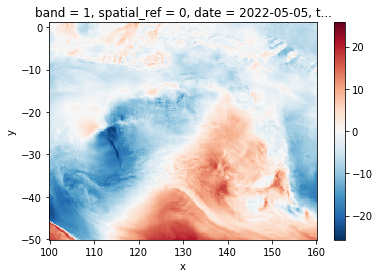

In [17]:
(rr[0] + rr[1]).plot()

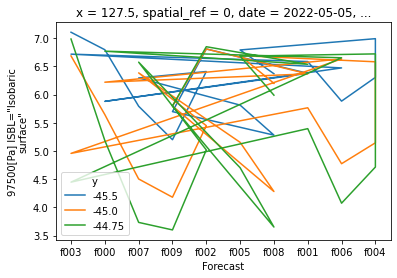

In [18]:
rr.isel(x=110, y=[-19, -21, -22]).plot.line(x="Forecast")

### Read GFS data for CA modelling

In [1]:
import xarray as xr
import rioxarray as rio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import os

In [43]:
rr = read_wind(path = "../Data")
rr

<xarray.DataArray (band: 48, y: 205, x: 241)>
dask.array<concatenate, shape=(48, 205, 241), dtype=float64, chunksize=(1, 205, 241), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
  * x            (x) float64 100.0 100.2 100.5 100.8 ... 159.2 159.5 159.8 160.0
  * y            (y) float64 1.0 0.75 0.5 0.25 0.0 ... -49.25 -49.5 -49.75 -50.0
    spatial_ref  int64 0
    date         datetime64[ns] 2022-05-22
    time         <U4 't18z'
    Component    (band) <U4 'ugrd' 'ugrd' 'ugrd' 'ugrd' ... 'vgrd' 'vgrd' 'vgrd'
    Forecast     (band) <U4 'f000' 'f001' 'f002' 'f003' ... 'f021' 'f022' 'f023'
Attributes:
    GRIB_COMMENT:                        u-component of wind [m/s]
    GRIB_DISCIPLINE:                     0(Meteorological)
    GRIB_ELEMENT:                        UGRD
    GRIB_FORECAST_SECONDS:               0 sec
    GRIB_IDS:                            CENTER=7(US-NCEP) SUBCENTER=0 MASTER...
    GRIB_PDS_PDTN:                       0
    GRIB_PDS_TEMPLATE_ASSEMBLED_VALUES:  2 2 2 0 81 0 0 1 0 100 0 85000 255 0 0
    GRIB_PDS_TEMPLATE_NUMBERS:           2 2 2 0 81 0 0 0 1 0 0 0 0 100 0 0 1...
    GRIB_REF_TIME:                       1653242400 sec UTC
    GRIB_SHORT_NAME:                     85000-ISBL
    GRIB_UNIT:                           [m/s]
    GRIB_VALID_TIME:                     1653242400 sec UTC
    scale_factor:                        1.0
    add_offset:                          0.0
    long_name:                           85000[Pa] ISBL="Isobaric surface"

In [44]:
r = rr[rr.Forecast == "f000"]
r

<xarray.DataArray (band: 2, y: 205, x: 241)>
dask.array<getitem, shape=(2, 205, 241), dtype=float64, chunksize=(1, 205, 241), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 1 1
  * x            (x) float64 100.0 100.2 100.5 100.8 ... 159.2 159.5 159.8 160.0
  * y            (y) float64 1.0 0.75 0.5 0.25 0.0 ... -49.25 -49.5 -49.75 -50.0
    spatial_ref  int64 0
    date         datetime64[ns] 2022-05-22
    time         <U4 't18z'
    Component    (band) <U4 'ugrd' 'vgrd'
    Forecast     (band) <U4 'f000' 'f000'
Attributes:
    GRIB_COMMENT:                        u-component of wind [m/s]
    GRIB_DISCIPLINE:                     0(Meteorological)
    GRIB_ELEMENT:                        UGRD
    GRIB_FORECAST_SECONDS:               0 sec
    GRIB_IDS:                            CENTER=7(US-NCEP) SUBCENTER=0 MASTER...
    GRIB_PDS_PDTN:                       0
    GRIB_PDS_TEMPLATE_ASSEMBLED_VALUES:  2 2 2 0 81 0 0 1 0 100 0 85000 255 0 0
    GRIB_PDS_TEMPLATE_NUMBERS:           2 2 2 0 81 0 0 0 1 0 0 0 0 100 0 0 1...
    GRIB_REF_TIME:                       1653242400 sec UTC
    GRIB_SHORT_NAME:                     85000-ISBL
    GRIB_UNIT:                           [m/s]
    GRIB_VALID_TIME:                     1653242400 sec UTC
    scale_factor:                        1.0
    add_offset:                          0.0
    long_name:                           85000[Pa] ISBL="Isobaric surface"

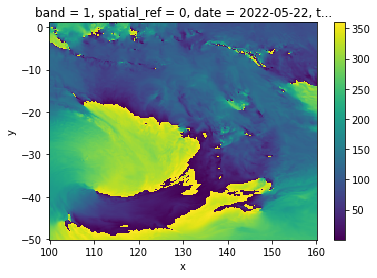

In [45]:
## calculate wind speed
rs = np.sqrt(np.power(r[r.Component == "ugrd"], 2) + np.power(r[r.Component == "vgrd"], 2))

## calculate the wind direction
## np.mod(180+np.rad2deg(np.arctan2(U, V)),360)
# rd = np.mod(180 + (180 / np.pi) * np.arctan2(r[r.Component == "ugrd"], r[r.Component == "vgrd"]), 360)
rd = np.mod(180 + np.rad2deg(np.arctan2(r[r.Component == "ugrd"], r[r.Component == "vgrd"])), 360)

rd.plot()

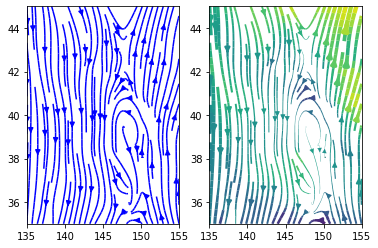

In [46]:
r2 = r.rio.clip_box(135, -45, 155, -35)

u = r2[r2.Component == "ugrd"].values[0]
v = r2[r2.Component == "vgrd"].values[0]
speed = np.sqrt(u*u + v*v)

x = r2.coords['x'].values
y = (r2.coords['y'] * -1).values

plt.figure()
plt.subplot(121)
plt.streamplot(x, y, u, v, density=1, color='b')
plt.subplot(122)
plt.streamplot(x, y, u, v, density=(1,1), color=u, linewidth=5*speed/speed.max())
# plt.subplot(133)
# plt.imshow(speed)
plt.show()

In [47]:
rd.isel(band=0, x=40, y=10).values

array(345.45707608)

In [48]:
r.rio.clip_box(135, -45, 155, -35)

<xarray.DataArray (band: 2, y: 41, x: 81)>
dask.array<getitem, shape=(2, 41, 81), dtype=float64, chunksize=(1, 41, 81), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 1 1
  * x            (x) float64 135.0 135.2 135.5 135.8 ... 154.2 154.5 154.8 155.0
  * y            (y) float64 -35.0 -35.25 -35.5 -35.75 ... -44.5 -44.75 -45.0
    date         datetime64[ns] 2022-05-22
    time         <U4 't18z'
    Component    (band) <U4 'ugrd' 'vgrd'
    Forecast     (band) <U4 'f000' 'f000'
    spatial_ref  int64 0
Attributes:
    GRIB_COMMENT:                        u-component of wind [m/s]
    GRIB_DISCIPLINE:                     0(Meteorological)
    GRIB_ELEMENT:                        UGRD
    GRIB_FORECAST_SECONDS:               0 sec
    GRIB_IDS:                            CENTER=7(US-NCEP) SUBCENTER=0 MASTER...
    GRIB_PDS_PDTN:                       0
    GRIB_PDS_TEMPLATE_ASSEMBLED_VALUES:  2 2 2 0 81 0 0 1 0 100 0 85000 255 0 0
    GRIB_PDS_TEMPLATE_NUMBERS:           2 2 2 0 81 0 0 0 1 0 0 0 0 100 0 0 1...
    GRIB_REF_TIME:                       1653242400 sec UTC
    GRIB_SHORT_NAME:                     85000-ISBL
    GRIB_UNIT:                           [m/s]
    GRIB_VALID_TIME:                     1653242400 sec UTC
    scale_factor:                        1.0
    add_offset:                          0.0
    long_name:                           85000[Pa] ISBL="Isobaric surface"

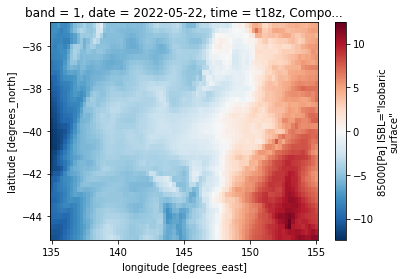

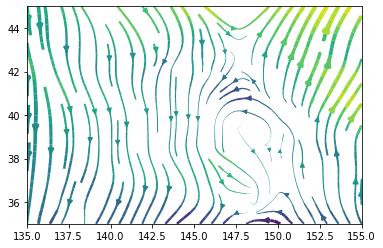

In [49]:
rast = r.rio.clip_box(135, -45, 155, -35)
# plt.subplot(121)
# rast[rast.Component == "ugrd"].plot()
# plt.subplot(122)
rast[rast.Component == "vgrd"].plot()

# rast[rast.Component == "ugrd"].rio.to_raster("/mnt/c/Users/61423/Desktop/u.tif")
# rast[rast.Component == "vgrd"].rio.to_raster("/mnt/c/Users/61423/Desktop/v.tif")

u = rast[rast.Component == "ugrd"].values[0]
v = rast[rast.Component == "vgrd"].values[0]
speed = np.sqrt(u*u + v*v)

x = rast.coords['x'].values
y = (rast.coords['y'] * -1).values

plt.figure()
# plt.subplot(121)
# plt.streamplot(x, y, u, v, density=1, color='b')
# plt.subplot(122)
plt.streamplot(x, y, u, v, density=(1,1), color=u, linewidth=5*speed/speed.max())
plt.show()

In [50]:
## the j direction are reversed! array indexing?!
def direction(x, i, j):
    inc = 1
    # define the direction
    if x < 22.5 or x > 337.5:
        ## N
        return [i, j + inc]
    elif x > 22.5 and x < 67.5:
        ## NE
        return [i - inc, j + inc]
    elif x > 67.5 and x < 112.5:
        ## E
        return [i - inc, j]
    elif x > 112.5 and x < 157.5:
        ## SE
        return [i - inc, j - inc]
    elif x > 157.5 and x < 202.5:
        ## S
        return [i, j - inc]
    elif x > 202.5 and x < 247.5:
        ## SW
        return [i + inc, j - inc]
    elif x > 247.5 and x < 292.5:
        ## W
        return [i + inc, j]
    elif x > 292.5 and x < 337.5:
        ## NW
        return [i + inc, j + inc]

direction(x = rd.isel(band=0, x=40, y=10).values, i = 40, j = 10)

[40, 11]

In [51]:
def wind(raster, forecast_id=0):
    fc = np.unique(raster.Forecast)
    r = raster[raster.Forecast == fc[forecast_id]]
    ## calculate wind speed
    rs = np.sqrt(np.power(r[r.Component == "ugrd"], 2) + np.power(r[r.Component == "vgrd"], 2))
    ## calculate the wind direction
    # rd = np.mod(180 + (180 / np.pi) * np.rad2deg(np.arctan2(r[r.Component == "ugrd"], r[r.Component == "vgrd"])), 360)
    rd = np.mod(180 + np.rad2deg(np.arctan2(r[r.Component == "ugrd"], r[r.Component == "vgrd"])), 360)
    return [rs, rd]

Remember that row is Y axes and column is the X axes.

In [97]:
# import libraries
from random import choices

# clip raster for faster tests
# rr2 = rr.copy().rio.clip_box(135, -45, 155, -35)
rr2 = rr.copy()

newr = rr2[rr2.Forecast == "f000"].copy()
newr = newr[newr.Component == "ugrd"]
newr[0] = 0

xlen = rr2.sizes['x']
ylen = rr2.sizes['y']

# 24 hours simulation
nforecast = 24
# cell size - can be calcualte with np.cos(np.radians(35)) * 111325 * 0.25
cellsize = 22000
# starting point
# points = [[41, 10]]
points = [[190, 145]]
# points = [[171, 55]]

# weights for the output
wt = [1, 1, 1, 1, 3, 1, 1, 1, 1]

# number of reapeats for simulation
nrep = 1

for rep in range(nrep):
    n = 0
    for f in range(nforecast):
        ww = wind(rr2, forecast_id = f)
        xx = int(points[n][0]) # x is column
        yy = int(points[n][1]) # y is row
        speed_ctr = ww[0].isel(band = 0, x = xx, y = yy).values
        step = max(1, round(speed_ctr * 3600 / cellsize)) * 2
        for e in range(step):
            nbr_dir = []
            nbr_spd = []
            for i in [-1, 0, 1]:
                for j in [-1, 0, 1]:
                    if xx + i < xlen and yy + j < ylen:
                        nbr_spd.append(float(ww[0].isel(band = 0, x = xx + i, y = yy + j).values))
                        nbr_dir.append(float(ww[1].isel(band = 0, x = xx + i, y = yy + j).values))
            probs = [a * b for a, b in zip(wt, nbr_spd)]
            # add some randomness to the direction
            selected_dir = choices(nbr_dir, weights = tuple(probs)) + np.random.uniform(-30, 30, 1)
            # keep the random direction within 0-360
            selected_dir = np.mod(selected_dir, 360)
            # newpoint = direction(ww[1].isel(band = 0, x = xx, y = yy).values, ww[0].isel(band = 0, x = xx, y = yy).values, i = xx, j = yy)
            newpoint = direction(selected_dir[0], i = xx, j = yy)
            points.append(newpoint)
            newr[0, newpoint[1], newpoint[0]] = newr[0, newpoint[1], newpoint[0]] + 1
            n += 1
        if nrep == 1 and n % 5 == 0:
            print("forecast:", n)
    print("simulation:", rep + 1)


forecast: 10
forecast: 20
forecast: 30
forecast: 50
simulation: 1


In [98]:
# newr.plot()

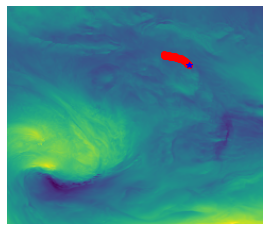

In [99]:
# plt.figure(figsize=(6, 5))
plt.imshow(rr2[0])
for i in range(len(points)):
    plt.plot(points[i][0], points[i][1], 'ro')
plt.plot(points[0][0], points[0][1], 'b*')
plt.axis(False)
plt.show()

In [100]:
import pandas as pd

df = pd.DataFrame(points)
df.columns = ["x", "y"]
df.to_csv("/mnt/c/Users/61423/Desktop/points.csv")

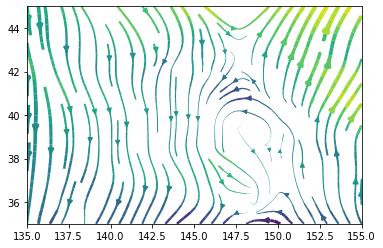

In [101]:
rast = r.rio.clip_box(135, -45, 155, -35)
u = rast[rast.Component == "ugrd"].values[0]
v = rast[rast.Component == "vgrd"].values[0]
speed = np.sqrt(u*u + v*v)

x = rast.coords['x'].values
y = (rast.coords['y'] * -1).values

plt.figure()
# plt.subplot(211)
# plt.streamplot(x, y, u, v, density=1, color='b')
# plt.subplot(212)
plt.streamplot(x, y, u, v, density=(1,1), color=u, linewidth=5*speed/speed.max())
plt.show()